In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import tensorflow as tf
import kerasncp as kncp
from kerasncp.tf import LTCCell
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
filenames = ["/home/laiy/gitrepos/cyber/ws/data_4.npy", "/home/laiy/gitrepos/cyber/ws/data_5.npy"]
stored = np.concatenate([np.load(f, allow_pickle=True) for f in filenames], axis=1)

In [3]:
df = pd.DataFrame(stored).transpose()
df

,0,1,2
0,"(6.858494281768799, 6.873743534088135, 6.84585...",0.00267,0.244249
1,"(6.900180816650391, 6.901637554168701, 6.87834...",0.0,0.25
2,"(6.943477630615234, 6.939493179321289, 6.89765...",0.0,0.25
3,"(6.937500476837158, 6.902166366577148, 6.87635...",0.0,0.25
4,"(6.953439712524414, 6.971370697021484, 6.92400...",0.0,0.25
...,...,...,...
2079,"(1.44596529006958, 1.4693502187728882, 1.52741...",-0.387955,0.0
2080,"(1.3716145753860474, 1.383205771446228, 1.4342...",-0.314,0.0
2081,"(1.3329777717590332, 1.336841344833374, 1.3580...",-0.314,0.0
2082,"(1.3213865756988525, 1.3252501487731934, 1.331...",-0.314,0.0


In [4]:
df2 = pd.DataFrame() 
for r in stored[0]: 
    r_row = np.asarray([r]).astype(np.float32)
    df2 = df2.append(pd.DataFrame(r_row))
df2.replace([np.inf, -np.inf], 100, inplace=True)
df2

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,6.858494,6.873744,6.845851,6.825926,6.819949,6.846583,6.875736,6.877728,6.889683,6.895660,...,6.840628,6.947824,6.971371,6.947463,6.918047,6.901638,6.897653,6.868420,6.875736,6.877728
0,6.900181,6.901638,6.878345,6.854524,6.860479,6.895660,6.917576,6.917577,6.929531,6.943478,...,6.859797,6.971371,7.009361,6.981333,6.947824,6.939493,6.921561,6.910107,6.913591,6.911599
0,6.943478,6.939493,6.897653,6.886285,6.887691,6.901638,6.949455,6.951793,6.957424,6.989303,...,6.891675,6.941868,7.039138,7.019188,6.974429,6.966440,6.935508,6.925987,6.938478,6.927973
0,6.937500,6.902166,6.876360,6.897653,6.920032,6.953440,6.955432,6.945838,6.977348,6.977348,...,6.975615,7.003405,6.983555,6.963705,6.957748,6.939883,6.937898,6.938479,6.933928,6.941485
0,6.953440,6.971371,6.924002,6.913592,6.914077,6.959734,6.985318,6.959734,6.975615,7.013211,...,6.909607,7.033183,7.067006,7.051067,7.016372,6.996399,6.957749,6.947824,6.979341,6.945838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.445965,1.469350,1.527412,1.539686,1.522299,1.516504,1.499117,1.485594,1.483662,1.477867,...,1.317523,1.323318,1.315591,1.323318,1.329114,1.342637,1.354228,1.371615,1.387070,1.430375
0,1.371615,1.383206,1.434273,1.447914,1.479094,1.501890,1.549345,1.531958,1.514572,1.495253,...,1.336841,1.329114,1.325250,1.319455,1.323318,1.321387,1.319455,1.332978,1.342637,1.365819
0,1.332978,1.336841,1.358092,1.367751,1.387070,1.432324,1.451812,1.479094,1.543118,1.551277,...,1.400592,1.381274,1.358092,1.336841,1.331046,1.327182,1.319455,1.315591,1.319455,1.323318
0,1.321387,1.325250,1.331046,1.336841,1.352296,1.365819,1.375478,1.398661,1.422580,1.444016,...,1.477867,1.445025,1.425707,1.400592,1.377410,1.358092,1.338773,1.323318,1.323318,1.319455


In [5]:
ranges = df2.to_numpy()
tmp = []
for r in ranges:
    tmp.append(np.transpose(np.asarray([r])).astype(np.float32))
ranges = np.asarray(tmp.copy())
print(np.shape(ranges))

(2084, 360, 1)


In [6]:
vel = df[1].to_numpy()
tmp = []
for v in vel:
    tmp.append(np.asarray([v]).astype(np.float32))
vel = np.asarray(tmp.copy())
print(np.shape(vel))

(2084, 1)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(ranges, vel, test_size=0.33, shuffle=True)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(1396, 360, 1)
(688, 360, 1)
(1396, 1)
(688, 1)


In [8]:
train_len = int(x_train.shape[0]/10)
print("train_len ", train_len)

test_len = int(x_test.shape[0]/10)
print("test_len ", test_len)

train_len  139
test_len  68


In [9]:
x_trainset = np.split(x_train[:train_len*10], train_len)
y_trainset = np.split(y_train[:train_len*10], train_len)
x_testset = np.split(x_test[:test_len*10], test_len)
y_testset = np.split(y_test[:test_len*10], test_len)

In [10]:
def plot_lidar(lidar,ax):
  # Helper function for plotting polar-based lidar data
    angles = np.linspace(-2.35,2.35,len(lidar))
    x = lidar*np.cos(angles)
    y = lidar*np.sin(angles)
    ax.plot(y,x)
    ax.scatter([0],[0],marker="^",color="black")
    ax.set_xlim((-6,6))
    ax.set_ylim((-2,6))

<ipython-input-11-7bcc9e944641>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


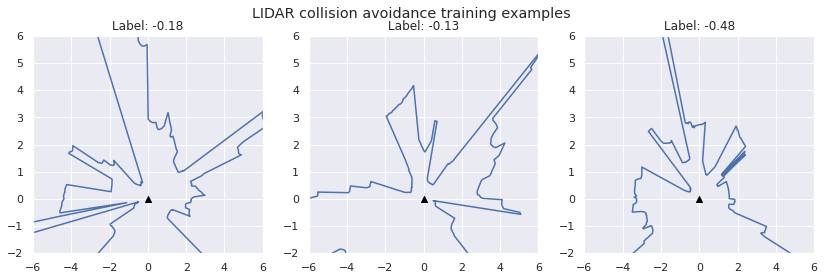

In [11]:
sns.set()
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
plot_lidar(x_train[0,:,0],ax1)
plot_lidar(x_train[12,:,0],ax2)
plot_lidar(x_train[-1,:,0],ax3)
ax1.set_title("Label: {:0.2f}".format(y_train[0,0]))
ax2.set_title("Label: {:0.2f}".format(y_train[12,0]))
ax3.set_title("Label: {:0.2f}".format(y_train[-1,0]))
fig.suptitle("LIDAR collision avoidance training examples")
fig.show()

In [12]:
x_trainset = np.asarray(x_trainset)
print(np.shape(x_trainset))
y_trainset = np.asarray(y_trainset)
print(np.shape(y_trainset))
x_testset = np.asarray(x_testset)
print(np.shape(x_testset))
y_testset = np.asarray(y_testset)
print(np.shape(y_testset))

(139, 10, 360, 1)
(139, 10, 1)
(68, 10, 360, 1)
(68, 10, 1)


In [13]:
N = x_trainset.shape[2]
channels = x_trainset.shape[3]

wiring = kncp.wirings.NCP(
    inter_neurons=12,  # Number of inter neurons
    command_neurons=8,  # Number of command neurons
    motor_neurons=1,  # Number of motor neurons
    sensory_fanout=4,  # How many outgoing synapses has each sensory neuron
    inter_fanout=4,  # How many outgoing synapses has each inter neuron
    recurrent_command_synapses=4,  # Now many recurrent synapses are in the
    # command neuron layer
    motor_fanin=6,  # How many incomming syanpses has each motor neuron
)
rnn_cell = LTCCell(wiring)

# We need to use the TimeDistributed layer to independently apply the
# Conv1D/MaxPool1D/Dense over each time-step of the input time-series.
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, N, channels)),
        keras.layers.TimeDistributed(
            keras.layers.Conv1D(18, 5, strides=3, activation="relu")
        ),
        keras.layers.TimeDistributed(
            keras.layers.Conv1D(20, 5, strides=2, activation="relu")
        ),
        keras.layers.TimeDistributed(keras.layers.MaxPool1D()),
        keras.layers.TimeDistributed(
            keras.layers.Conv1D(22, 5, activation="relu")
        ),
        keras.layers.TimeDistributed(keras.layers.MaxPool1D()),
        keras.layers.TimeDistributed(
            keras.layers.Conv1D(24, 5, activation="relu")
        ),
        keras.layers.TimeDistributed(keras.layers.Flatten()),
        keras.layers.TimeDistributed(keras.layers.Dense(32, activation="relu")),
        keras.layers.RNN(rnn_cell, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.001), loss="mean_squared_error")

model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
time_distributed (TimeDistributed)           (None, None, 119, 18)                   108            
____________________________________________________________________________________________________
time_distributed_1 (TimeDistributed)         (None, None, 58, 20)                    1820           
____________________________________________________________________________________________________
time_distributed_2 (TimeDistributed)         (None, None, 29, 20)                    0              
____________________________________________________________________________________________________
time_distributed_3 (TimeDistributed)         (None, None, 25, 22)                    2222           
_______________________________________________________________________

In [14]:
train = model.fit(
    x=x_trainset, y=y_trainset, batch_size=10, epochs=80, validation_data=(x_testset, y_testset)
)

Epoch 1/80
14/14 [==============================] - 8s 72ms/step - loss: 0.2200 - val_loss: 0.1666
Epoch 2/80
14/14 [==============================] - 0s 28ms/step - loss: 0.1758 - val_loss: 0.1508
Epoch 3/80
14/14 [==============================] - 0s 30ms/step - loss: 0.1618 - val_loss: 0.1447
Epoch 4/80
14/14 [==============================] - 0s 34ms/step - loss: 0.1563 - val_loss: 0.1450
Epoch 5/80
14/14 [==============================] - 0s 31ms/step - loss: 0.1551 - val_loss: 0.1431
Epoch 6/80
14/14 [==============================] - 0s 29ms/step - loss: 0.1540 - val_loss: 0.1425
Epoch 7/80
14/14 [==============================] - 0s 26ms/step - loss: 0.1532 - val_loss: 0.1419
Epoch 8/80
14/14 [==============================] - 0s 26ms/step - loss: 0.1525 - val_loss: 0.1409
Epoch 9/80
14/14 [==============================] - 0s 27ms/step - loss: 0.1515 - val_loss: 0.1410
Epoch 10/80
14/14 [==============================] - 0s 29ms/step - loss: 0.1506 - val_loss: 0.1397
Epoch 11/

In [15]:
path = '/home/laiy/gitrepos/cyber/ws/src/Jackal_NCP/rosbag/model/model_angular'
model.save(path)

INFO:tensorflow:Assets written to: /home/laiy/gitrepos/cyber/ws/src/Jackal_NCP/rosbag/model/model_angular/assets


In [16]:
saved_model = tf.keras.models.load_model(path)
model = saved_model

In [17]:
test_loss = model.evaluate(x_testset,  y_testset, verbose=2)
print("test_loss ", test_loss)

3/3 - 0s - loss: 0.1321
test_loss  0.13207852840423584


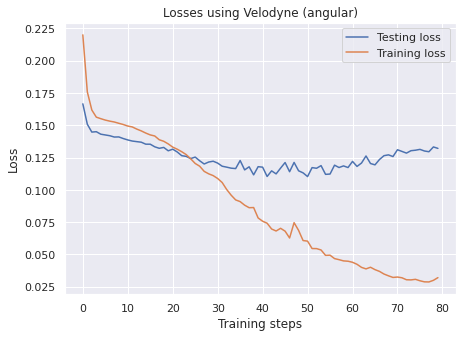

In [29]:
# Let's visualize the training loss 
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(7, 5))
plt.plot(train.history["val_loss"], label="Testing loss")
plt.plot(train.history["loss"], label="Training loss")
plt.legend(loc="upper right")
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.title('Losses using Velodyne (angular)')
plt.savefig('Part1_losses_angular.png')
plt.show()


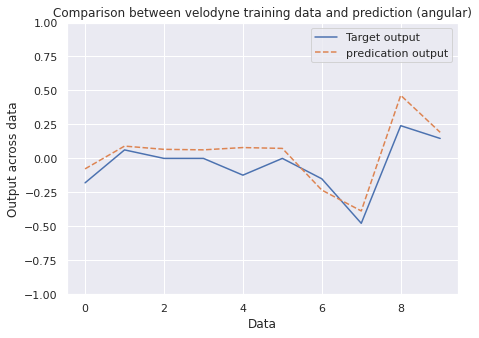

In [30]:
prediction = model(x_trainset).numpy()
plt.figure(figsize=(7, 5))
plt.plot(y_trainset[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="predication output",linestyle="dashed")
plt.ylim((-1, 1))
plt.legend(loc="upper right")
plt.ylabel("Output across data")
plt.xlabel("Data")
plt.title('Comparison between velodyne training data and prediction (angular)')
plt.savefig('Part1_training_result_angular.png')
plt.show()


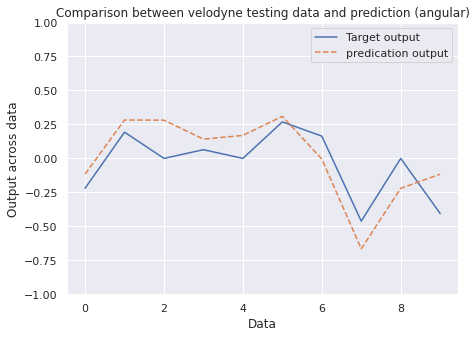

In [31]:
prediction = model(x_testset).numpy() 
plt.figure(figsize=(7, 5))
plt.plot(y_testset[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="predication output",linestyle="dashed")
plt.ylim((-1, 1))
plt.legend(loc="upper right")

plt.ylabel("Output across data")
plt.xlabel("Data")
plt.title('Comparison between velodyne testing data and prediction (angular)')
plt.savefig('Part1_testing_result_angular.png')
plt.show()


## Check output

In [21]:
test = x_testset[0][0]
print(np.shape(test))

test = np.array([[test]])
print(np.shape(test))

pred = model(test).numpy()[0][0][0]
pred = pred
print("pred = ", pred)
print("ground = ", y_testset[0][0][0])

(360, 1)
(1, 1, 360, 1)
pred =  -0.11497453
ground =  -0.21959524
